dimensionsumD: ()
U: (784, 784) D: (500,)
meanpicshape (784,)
ndata: 6000
Reconstruction Error mean: 3436023.412205305
zshape: (784, 6000)
sum10compshape: (784, 6000)
Reconstruction 10components Error mean: 1731315.3279392195


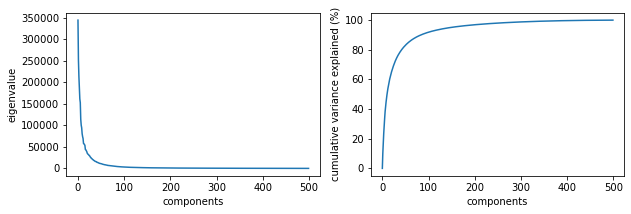

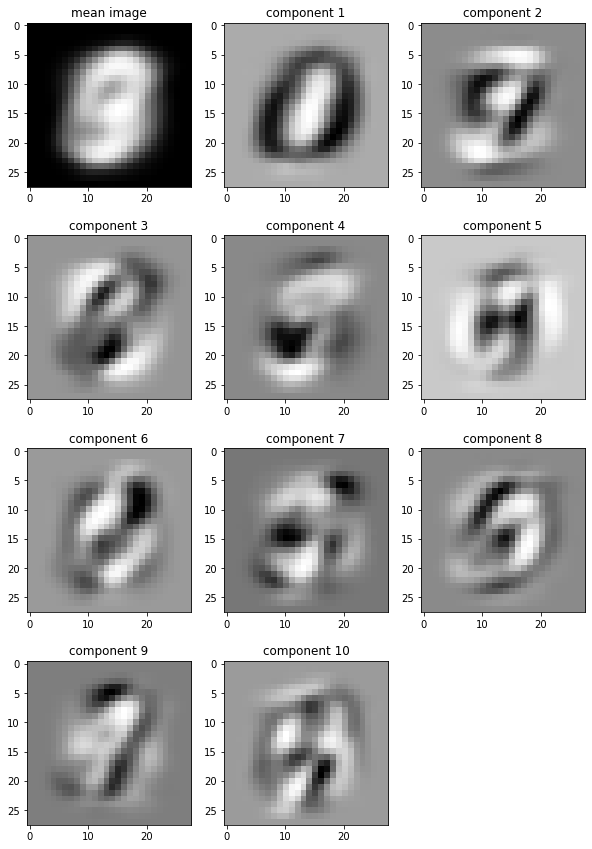

In [49]:
# Starter code for use with autograder.
import numpy as np
import matplotlib.pyplot as plt


def get_cumul_var(mnist_pics,
                  num_leading_components=500):

    """
    Perform PCA on mnist_pics and return cumulative fraction of variance
    explained by the leading k components.

    Returns:
        A (num_leading_components, ) numpy array where the ith component
        contains the cumulative fraction (between 0 and 1) of variance explained
        by the leading i components.

    Args:

        mnist_pics, (N x D) numpy array:
            Array containing MNIST images.  To pass the test case written in
            T5_P2_Autograder.py, mnist_pics must be a 2D (N x D) numpy array,
            where N is the number of examples, and D is the dimensionality of
            each example.

        num_leading_components, int:
            The variable representing k, the number of PCA components to use.
    """
    
    # TODO: compute PCA on input mnist_pics
    pmean=np.mean(mnist_pics,0)
    p_prime=mnist_pics-pmean
    C = np.cov(p_prime.T)
    D, U = np.linalg.eigh(C)
    
    idx = np.abs(D).argsort(); idx=idx[::-1];  # sort the eigenvalues
    D = 1*D[idx]
    U = 1*U[:,idx]
    
 
    # TODO: return a (num_leading_components, ) numpy array with the cumulative
    # fraction of variance for the leading k components
    ret = np.zeros(num_leading_components)
    sumD=np.sum(D)
    print("dimensionsumD:",sumD.shape)
    ret=D/np.sum(D)
    ret=ret[0:num_leading_components]
    
    

    return D[0:num_leading_components],ret,U,p_prime

# Load MNIST.
mnist_pics = np.load("data/images.npy")

# Reshape mnist_pics to be a 2D numpy array.
num_images, height, width = mnist_pics.shape
mnist_pics = np.reshape(mnist_pics, newshape=(num_images, height * width))

num_leading_components = 500

D,cum_var,U,p_prime = get_cumul_var(
    mnist_pics=mnist_pics,
    num_leading_components=num_leading_components)


print("U:",U.shape,"D:",D.shape)
figure,ax=plt.subplots(figsize=(10,3))

ax=plt.subplot(1,2,1)
plt.plot(np.arange(num_leading_components),D)
plt.xlabel('components')
plt.ylabel('eigenvalue')
ax=plt.subplot(1,2,2)
plt.plot(np.arange(num_leading_components),[np.sum(cum_var[:i])*100 for i in range(num_leading_components)])
plt.xlabel('components')
plt.ylabel('cumulative variance explained (%)')


# Example of how to plot an image.
meanpic=np.mean(mnist_pics,0)
print("meanpicshape",meanpic.shape)
figure,ax=plt.subplots(figsize=(10,15))
ax=plt.subplot(4,3,1)
plt.imshow(np.mean(mnist_pics,0).reshape(28,28), cmap='Greys_r')
plt.title('mean image')
for i in range(10):
    ax=plt.subplot(4,3,i+2)
    plt.imshow(U[:,i].reshape(28,28), cmap='Greys_r')
    plt.title('component '+str(i+1))

print("ndata:", len(mnist_pics))
Lmean=np.sum((mnist_pics-meanpic)**2)/len(mnist_pics)
print('Reconstruction Error mean:',Lmean)


z=U.T.dot(p_prime.T)
print("zshape:",z.shape)
ncomp=10
sum10comp=0
UL=U[:,:ncomp]
sum10comp=UL.dot(z[:ncomp,:])
    
print("sum10compshape:",sum10comp.shape)

Lmean10=np.sum((sum10comp-p_prime.T)**2)/len(mnist_pics)
print('Reconstruction 10components Error mean:',Lmean10)
